In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import xskillscore as xs

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "dfeos"
print(variable)
model = "CESM2-WACCM"
print(model)
experiment = "ssp585"
print(experiment)
freq = "Omon"
print(freq)

dfeos
CESM2-WACCM
ssp585
Omon


In [5]:
nc = Dataset("Data/Raw/dfeos_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_210101-215012.nc")
unit = getattr(nc.variables[variable], "units")
print(unit)

mol m-3


In [7]:
new = []
historical = []

In [74]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)
        new.append("Data/Raw/{}".format(file))

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)
        historical.append("Data/Raw/{}".format(file))

dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-203412.nc
dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc
dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012_cropped.nc
dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012_flattened.nc
dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_203501-205412.nc
dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_205501-207412.nc
dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_207501-209412.nc
dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_209501-210012.nc


dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-186912.nc
dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_187001-188912.nc
dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_189001-190912.nc
dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_191001-192912.nc
dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_193001-194912.nc
dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_195001-196912.nc
dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_197001-198912.nc
dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_199001-200912.nc
dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_201001-201412.nc


In [55]:
new = ' '.join(new)
new

'Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-203412.nc Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_203501-205412.nc Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_205501-207412.nc Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_207501-209412.nc Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_209501-210012.nc'

In [56]:
os.putenv("new", ' '.join(new))

In [59]:
!cdo mergetime $new Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc

cdo    mergetime: Processed 5 variables over 1032 timesteps [704.15s 263MB].


In [75]:
historical = ' '.join(historical[-2:])
historical

'Data/Raw/dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_199001-200912.nc Data/Raw/dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_201001-201412.nc'

In [76]:
os.putenv("historical", ' '.join(historical))

In [78]:
!cdo mergetime $historical Data/Raw/dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_199001-201412.nc

cdo    mergetime: Processed 2 variables over 300 timesteps [214.51s 232MB].


### New

In [8]:
nc = xarray.open_dataset("Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-203412.nc")
level = nc["lev"].values

print(level)
index = np.argwhere(level > 8)[0].tolist()
index

[5.12634018e-01 1.62101503e+00 2.85843078e+00 4.25051257e+00
 5.82795982e+00 7.62753193e+00 9.69322998e+00 1.20777023e+01
 1.48439141e+01 1.80671257e+01 2.18372320e+01 2.62615205e+01
 3.14679097e+01 3.76087381e+01 4.48651697e+01 5.34522856e+01
 6.36249198e+01 7.56842782e+01 8.99853529e+01 1.06945088e+02
 1.27051185e+02 1.50871316e+02 1.79062399e+02 2.12379351e+02
 2.51682571e+02 2.97943076e+02 3.52244006e+02 4.15776916e+02
 4.89831167e+02 5.75774777e+02 6.75025394e+02 7.89010821e+02
 9.19119601e+02 1.06664372e+03 1.23271715e+03 1.41825541e+03
 1.62390244e+03 1.84999085e+03 2.09652065e+03 2.36315921e+03
 2.64926262e+03 2.95391532e+03 3.27598337e+03 3.61417477e+03
 3.96710098e+03 4.33333419e+03 4.71145677e+03 5.10010069e+03
 5.49797658e+03 5.90389290e+03]


[6]

In [7]:
!cdo -sellevidx,1 -selname,dfe Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012_cropped.nc

cdo(1) selname: Process started
cdo(1) selname: Processed 1 variable over 1032 timesteps.
cdo    sellevidx: Processed 109086528 values from 1 variable over 1032 timesteps [1008.00s 218MB].


In [8]:
nc = xarray.open_dataset("Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012_cropped.nc")
nc

<xarray.Dataset>
Dimensions:         (time: 1032, bnds: 2, i: 292, j: 362, vertices: 4, lev: 1)
Coordinates:
  * time            (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    longitude       (i, j) float64 ...
    latitude        (i, j) float64 ...
  * j               (j) int32 0 1 2 3 4 5 6 7 ... 355 356 357 358 359 360 361
  * i               (i) int32 0 1 2 3 4 5 6 7 ... 285 286 287 288 289 290 291
  * lev             (lev) float64 0.5126
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds       (time, bnds) object ...
    longitude_bnds  (i, j, vertices) float64 ...
    latitude_bnds   (i, j, vertices) float64 ...
    lev_bnds        (lev, bnds) float64 ...
    dfe             (time, lev, i, j) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 08 18:25:10 2022: cdo -sellevidx,1 -selna...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            dfe
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/c125f329-1227-4f11-9410-7926868e538b
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [12]:
!cdo vertmean Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012_cropped.nc Data/Raw/dfe_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012_flattened.nc

cdo    vertmean: Processed 1 variable over 1032 timesteps [125.25s 228MB].


### Historical

In [9]:
!cdo -sellevidx,1 -selname,dfe Data/Raw/dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_199001-201412.nc Data/Raw/dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_199001-201412_cropped.nc

cdo(1) selname: Process started
cdo(1) selname: Processed 1 variable over 300 timesteps.
cdo    sellevidx: Processed 31711200 values from 1 variable over 300 timesteps [306.39s 225MB].


In [10]:
nc = xarray.open_dataset("Data/Raw/dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_199001-201412_cropped.nc")
nc

<xarray.Dataset>
Dimensions:         (time: 300, bnds: 2, i: 292, j: 362, vertices: 4, lev: 1)
Coordinates:
  * time            (time) object 1990-01-16 12:00:00 ... 2014-12-16 12:00:00
    longitude       (i, j) float64 ...
    latitude        (i, j) float64 ...
  * j               (j) int32 0 1 2 3 4 5 6 7 ... 355 356 357 358 359 360 361
  * i               (i) int32 0 1 2 3 4 5 6 7 ... 285 286 287 288 289 290 291
  * lev             (lev) float64 0.5126
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds       (time, bnds) object ...
    longitude_bnds  (i, j, vertices) float64 ...
    latitude_bnds   (i, j, vertices) float64 ...
    lev_bnds        (lev, bnds) float64 ...
    dfe             (time, lev, i, j) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 08 18:43:36 2022: cdo -sellevidx,1 -selna...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            dfe
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/634c0ad9-2011-467c-aea2-974591e15df4
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [13]:
!cdo vertmean Data/Raw/dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_199001-201412_cropped.nc Data/Raw/dfe_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_199001-201412_flattened.nc

cdo    vertmean: Processed 1 variable over 300 timesteps [81.19s 228MB].


## Interpolation 


In [8]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)
    #    new.append("Data/Raw/{}".format(file))

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)
     #   historical.append("Data/Raw/{}".format(file))

dfeos_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_220101-225012.nc
dfeos_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc
dfeos_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_210101-215012.nc
dfeos_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_215101-220012.nc
dfeos_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_225101-229912.nc


dfeos_Omon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc


In [9]:
!cdo remapdis,r360x180 Data/Raw/dfeos_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdo    remapdis: Distance-weighted average weights from curvilinear (320x384) to lonlat (360x180) grid, with source mask (86096)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1032 timesteps [12.92s 250MB].


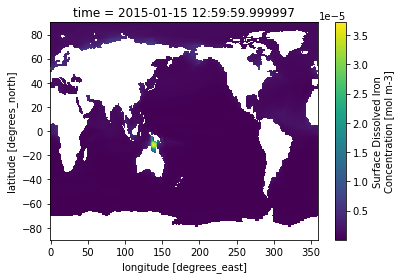

In [10]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [11]:
!cdo remapdis,r360x180 Data/Raw/dfeos_Omon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdo    remapdis: Distance-weighted average weights from curvilinear (320x384) to lonlat (360x180) grid, with source mask (86096)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1980 timesteps [24.82s 257MB].


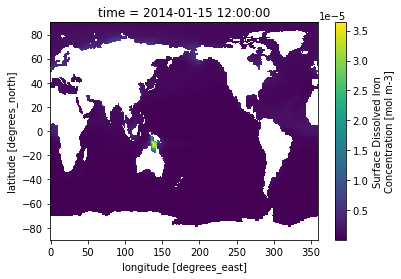

In [12]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## Sea ice selection

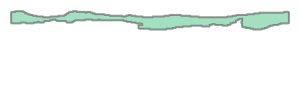

In [6]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [7]:
ice = gpd.GeoSeries(shape['geometry'][0])

### ssp585

In [15]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) object 2015-01-15 12:59:59.999997 ... 2100-12-15 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    dfeos    (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 15:05:46 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/93afc5d8-b9e6-4e36-b17b-ef8361371ad9
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [16]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) object 2015-01-15 12:59:59.999997 ... 2100-12-15 12:0...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    dfeos        (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 15:05:46 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/93afc5d8-b9e6-4e36-b17b-ef8361371ad9
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [17]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

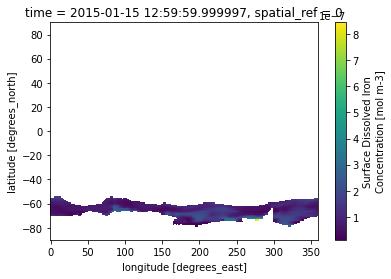

In [18]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [19]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### historical


In [8]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time=slice('1995-01', '2014-12'))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 240, lon: 360, lat: 180)
Coordinates:
  * time     (time) object 1995-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    dfeos    (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 15:06:03 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/a2c4d8ef-04dc-4db9-8023-9ad7612f8261
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [9]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 240, lon: 360, lat: 180)
Coordinates:
  * time         (time) object 1995-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    dfeos        (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 15:06:03 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/a2c4d8ef-04dc-4db9-8023-9ad7612f8261
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [10]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

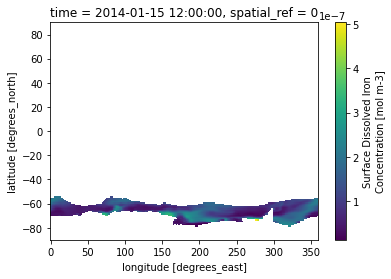

In [11]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [12]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## 20 year of sea ice area 

### historical

In [13]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 1995-01-15 12:00:00 ... 2014-12-15 12:00:00
Data variables:
    spatial_ref  int64 ...
    dfeos        (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 15:06:03 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/a2c4d8ef-04dc-4db9-8023-9ad7612f8261
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [14]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 1995-01-15 12:00:00 ... 2014-12-15 12:00:00
Data variables:
    dfeos    (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 15:06:03 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/a2c4d8ef-04dc-4db9-8023-9ad7612f8261
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [15]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dfeos    (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

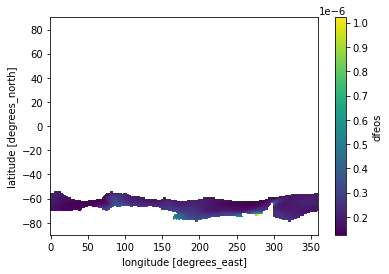

In [16]:
historical_mean[variable].plot()

In [17]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [18]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [19]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) object 1995-12-01 00:00:00 ... 2014-12-01 00:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dfeos    (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [20]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [21]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [22]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter.nc".format(variable, model), mode = "w", format = "NETCDF4")

### ssp585

In [23]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-15 12:59:59.999997 ... 2100-12-15 12:0...
Data variables:
    spatial_ref  int64 ...
    dfeos        (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 15:05:46 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/93afc5d8-b9e6-4e36-b17b-ef8361371ad9
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [24]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 2081-01-15 12:00:00 ... 2100-12-15 12:00:00
Data variables:
    dfeos    (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 15:05:46 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/93afc5d8-b9e6-4e36-b17b-ef8361371ad9
    variable_id:            dfeos
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [25]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dfeos    (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

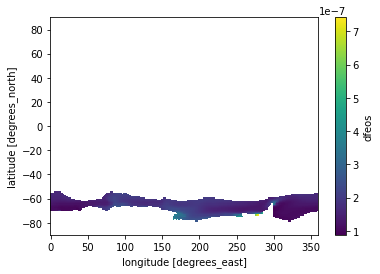

In [26]:
new_mean[variable].plot()

In [27]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Season

In [28]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [29]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) object 2081-12-01 00:00:00 ... 2100-12-01 00:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dfeos    (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [30]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [31]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) object 2081-06-01 00:00:00 ... 2100-06-01 00:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dfeos    (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [32]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dfeos    (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [33]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [34]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dfeos    (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

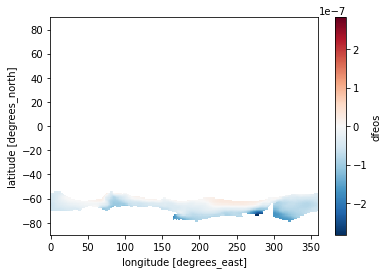

In [35]:
difference = new - historical
difference[variable].plot()
difference

In [36]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

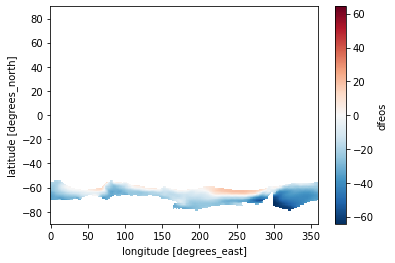

In [37]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [38]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summer

In [39]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dfeos    (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

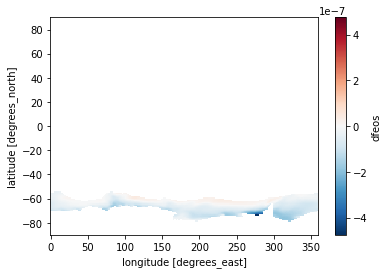

In [40]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [41]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

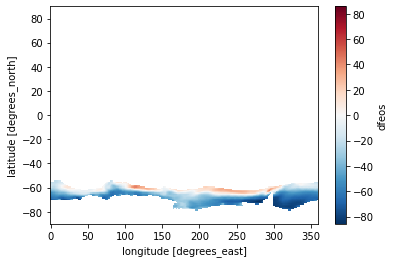

In [42]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [43]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [44]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dfeos    (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

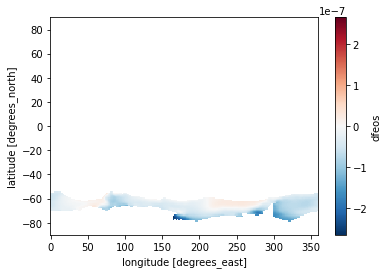

In [45]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [46]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

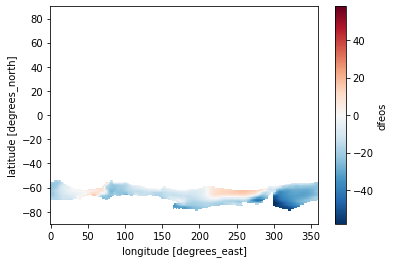

In [47]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [48]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Summary values

In [49]:
mean = (percentage.mean())[variable].values
median = (percentage.median())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
median_abs = (difference.median())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean, mean_abs, median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = -19.819496154785156% -4.75426666923795e-08
Median change = -20.29590606689453% -4.20116137433979e-08
Max inc = 19.556520462036133% 2.9750452767984825e-08
Max dec = -64.26545715332031% -2.8273370844544843e-07


In [50]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                           mean, mean_abs, 
                                                                                                                           median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

#### Season

In [51]:
mean_summer = (percentage_summer.mean())[variable].values
median_summer = (percentage_summer.median())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values


mean_abs_summer = (difference_summer.mean())[variable].values
median_abs_summer = (difference_summer.median())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [52]:
mean_winter = (percentage_winter.mean())[variable].values
median_winter = (percentage_winter.median())[variable].values
max_value_winter = (percentage_winter.max())[variable].values
min_value_winter = (percentage_winter.min())[variable].values

mean_abs_winter = (difference_winter.mean())[variable].values
median_abs_winter = (difference_winter.median())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values

In [53]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nSummer:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                                    median_summer, median_abs_summer,
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [54]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                                     median_winter, median_abs_winter,
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## Zonal Absolute/Percentage Change

In [55]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

#### Increasing

In [56]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    dfeos        (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

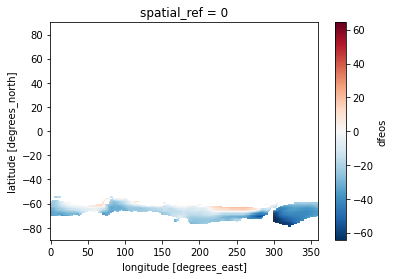

In [57]:
inc_area[variable].plot()

In [58]:
inc_area.to_netcdf(path = "Data/{}_{}_percentage_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [59]:
ab = xarray.open_dataset("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))

ab.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ab.rio.write_crs("epsg:4326", inplace=True)

ab_inc_area = ab.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    dfeos        (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

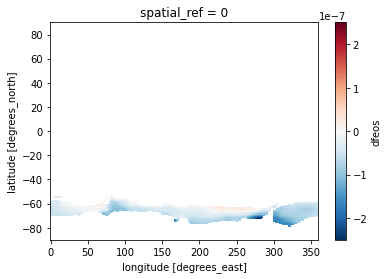

In [60]:
ab_inc_area[variable].plot()

In [61]:
ab_inc_area.to_netcdf(path = "Data/{}_{}_absolute_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [62]:
inc_mean = (inc_area.mean())[variable].values
inc_median = (inc_area.median())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

inc_mean_abs = (ab_inc_area.mean())[variable].values
inc_median_abs = (ab_inc_area.median())[variable].values
inc_max_value_abs = (ab_inc_area.max())[variable].values
inc_min_value_abs = (ab_inc_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))

Mean change = -21.79303741455078% -5.043079909228254e-08
 Max inc = 19.556520462036133% 2.760127415513125e-08
 Max dec = -64.26545715332031% -2.5049345708794135e-07



In [63]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                                                                                  inc_median, inc_median_abs,
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))
summary.close()

#### Decreasing

In [64]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    dfeos        (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

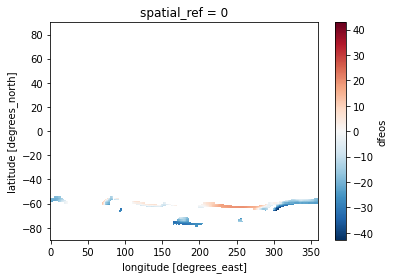

In [65]:
dec_area[variable].plot()

In [66]:
dec_area.to_netcdf(path = "Data/{}_{}_percentage_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [67]:
ab_dec_area = ab.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    dfeos        (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

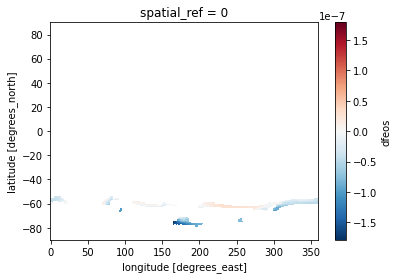

In [68]:
ab_dec_area[variable].plot()

In [69]:
ab_dec_area.to_netcdf(path = "Data/{}_{}_absolute_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [70]:
dec_mean = (dec_area.mean())[variable].values
dec_median = (dec_area.median())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

dec_mean_abs = (ab_dec_area.mean())[variable].values
dec_median_abs = (ab_dec_area.median())[variable].values
dec_max_value_abs = (ab_dec_area.max())[variable].values
dec_min_value_abs = (ab_dec_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))

Mean change = -8.233499526977539% -2.6559645149859534e-08
 Max inc = 19.556520462036133% 2.9750452767984825e-08
 Max dec = -42.780113220214844% -1.7898852888720285e-07



In [71]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                                                                                dec_median, dec_median_abs,
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))
summary.close()

## Absolute map

##### Mapping

In [50]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

In [72]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

In [73]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

#var_old = np.nanmean(var_old, axis = 0) 

old_max = np.nanmax(var_old)
old_min = np.nanmin(var_old)
print(old_max, old_min)


var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

1.0216427e-06 1.2625942e-07


In [74]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

#var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

7.422173e-07 8.794347e-08


In [75]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

1.0216427e-06 8.794347e-08


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

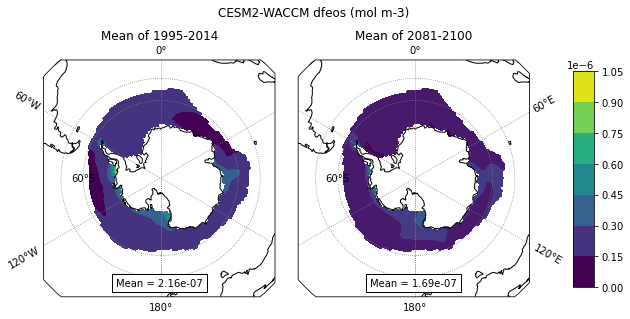

In [76]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('Mean of 1995-2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2e}".format(old.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('Mean of 2081-2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2e}".format(new.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_2014vs2100.png".format(model, variable, model))

plt.show()

## Percentage Change map

In [77]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dfeos    (lat, lon) float32 ...

In [78]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

18.064165115356445 -42.94249153137207
19.55652 -64.26546


In [58]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

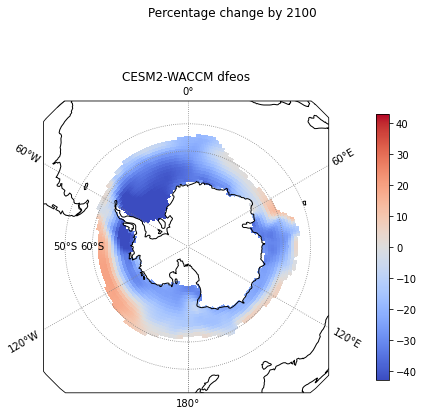

In [79]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

## Correlation with epc100

### Zonal

#### Inc

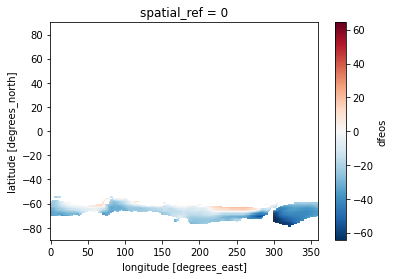

In [80]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
current_inc_per.plot()
exp_inc_per = xarray.open_dataarray("Data/epc100_{}_percentage_inc.nc".format(model), decode_coords="all")

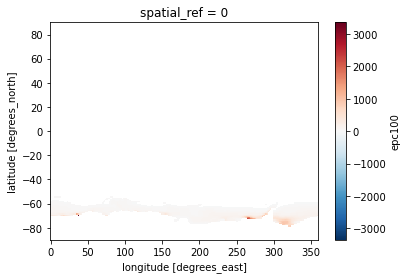

In [81]:
exp_inc_per.plot()

In [82]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(-0.49461352)
Coordinates:
    spatial_ref  int64 0

In [83]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(1.98163046e-239)

In [84]:
current_inc_abs = xarray.open_dataarray("Data/{}_{}_absolute_inc.nc".format(variable, model), decode_coords="all")
exp_inc_abs = xarray.open_dataarray("Data/epc100_{}_absolute_inc.nc".format(model), decode_coords="all")

In [85]:
cor_inc_abs = xarray.corr(current_inc_abs, exp_inc_abs, dim = ["lat", "lon"])
cor_inc_abs

<xarray.DataArray ()>
array(-0.58226359)
Coordinates:
    spatial_ref  int64 0

In [86]:
cor_inc_abs_p = xs.pearson_r_p_value(current_inc_abs, exp_inc_abs, dim = ["lat", "lon"], skipna=True)
cor_inc_abs_p.values

array(0.)

In [87]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nPercentage correlation with epc100: {} p = {:.5f}\nAbsolute correlation with epc100: {} p = {:.5f}".format(cor_inc_per.values, 
                                                                                                                                                  cor_inc_per_p.values,
                                                                                                                                                  cor_inc_abs.values,
                                                                                                                                                 cor_inc_abs_p.values))
summary.close()

#### Dec

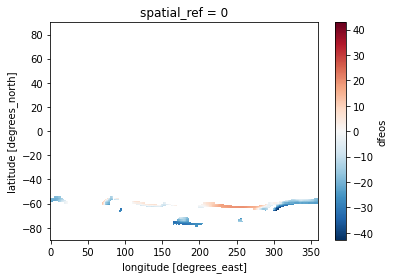

In [88]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
current_dec_per.plot()
exp_dec_per = xarray.open_dataarray("Data/epc100_{}_percentage_dec.nc".format(model), decode_coords="all")

In [89]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(-0.03702042)
Coordinates:
    spatial_ref  int64 0

In [90]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(0.21966778)

In [91]:
current_dec_abs = xarray.open_dataarray("Data/{}_{}_absolute_dec.nc".format(variable, model), decode_coords="all")
exp_dec_abs = xarray.open_dataarray("Data/epc100_{}_absolute_dec.nc".format(model), decode_coords="all")

In [92]:
cor_dec_abs = xarray.corr(current_dec_abs, exp_dec_abs, dim = ["lat", "lon"])
cor_dec_abs

<xarray.DataArray ()>
array(0.25648461)
Coordinates:
    spatial_ref  int64 0

In [93]:
cor_dec_abs_p = xs.pearson_r_p_value(current_dec_abs, exp_dec_abs, dim = ["lat", "lon"], skipna=True)
cor_dec_abs_p.values

array(5.34017995e-18)

In [94]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone:\nPercentage correlation with epc100: {} p = {:.5f}\nAbsolute correlation with epc100: {} p = {:.5f}".format(cor_dec_per.values, 
                                                                                                                                                cor_dec_per_p.values,
                                                                                                                                                cor_dec_abs.values,
                                                                                                                                               cor_dec_abs_p.values))
summary.close()

### Seasonal

#### Summer

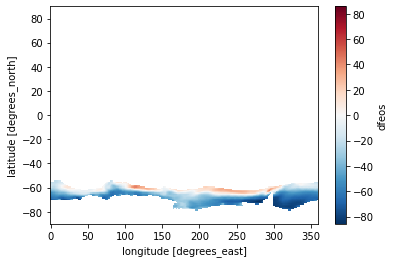

In [95]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
current_summer_per.plot()
exp_summer_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

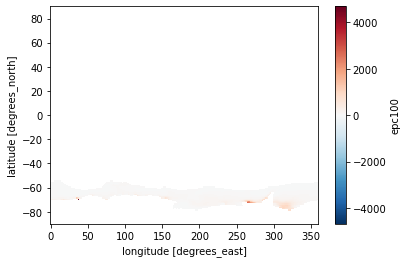

In [96]:
exp_summer_per.plot()

In [97]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(-0.43967192)

In [98]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(1.10991183e-214)

In [99]:
current_summer_abs = xarray.open_dataarray("Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_abs = xarray.open_dataarray("Data/epc100_{}_{}_absolute_summer.nc".format(model, experiment), decode_coords="all")

In [100]:
cor_summer_abs = xarray.corr(current_summer_abs, exp_summer_abs, dim = ["lat", "lon"])
cor_summer_abs

<xarray.DataArray ()>
array(-0.78173587)

In [101]:
cor_summer_abs_p = xs.pearson_r_p_value(current_summer_abs, exp_summer_abs, dim = ["lat", "lon"], skipna=True)
cor_summer_abs_p.values

array(0.)

In [102]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSummer:\nPercentage correlation with epc100: {} p = {:.5f}\nAbsolute correlation with epc100: {} p = {:.5f}".format(cor_summer_per.values, 
                                                                                                                                                  cor_summer_per_p.values,
                                                                                                                                                  cor_summer_abs.values,
                                                                                                                                                 cor_summer_abs_p.values))
summary.close()

#### Winter

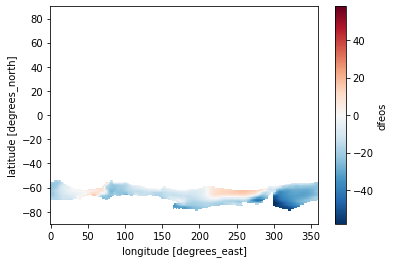

In [103]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
current_winter_per.plot()
exp_winter_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [104]:
exp_winter_per = exp_winter_per.where(exp_winter_per != np.inf)

In [105]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(-0.0334634)

In [106]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(0.02405508)

In [107]:
current_winter_abs = xarray.open_dataarray("Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_abs = xarray.open_dataarray("Data/epc100_{}_{}_absolute_winter.nc".format(model, experiment), decode_coords="all")

In [108]:
cor_winter_abs = xarray.corr(current_winter_abs, exp_winter_abs, dim = ["lat", "lon"])
cor_winter_abs

<xarray.DataArray ()>
array(-0.07972215)

In [109]:
cor_winter_abs_p = xs.pearson_r_p_value(current_winter_abs, exp_winter_abs, dim = ["lat", "lon"], skipna=True)
cor_winter_abs_p.values

array(7.14022734e-08)

In [110]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nPercentage correlation with epc100: {} p = {:.5f}\nAbsolute correlation with epc100: {} p = {:.5f}".format(cor_winter_per.values, 
                                                                                                                                                cor_winter_per_p.values,
                                                                                                                                                cor_winter_abs.values,
                                                                                                                                               cor_winter_abs_p.values))
summary.close()